In [1]:
import numpy as np
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# inputFile = sys.stdin.readlines()
filename = "input/input06.txt"
with open(filename) as f:
    inputFile = f.readlines()

In [2]:
def preprocess (inputFile):
    n = len(inputFile)
    cols = np.array([cell for row in inputFile for cell in row.strip("\n").split(" ")])
    m = int(len(cols)/n)
    X_list = [int(c) for row in inputFile for cell in row.strip("\n").split(" ") for c in cell.split(",")]
    X_array = np.array(X_list)
    return n, m, X_array

In [38]:
!pip install scipy

In [39]:
from scipy import misc

In [42]:
X_array = misc.imread('input/own_circle.png')
n = X_array.shape[0]
m = X_array.shape[1]

C:\Users\lbala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [3]:
n, m, X_array = preprocess(inputFile)

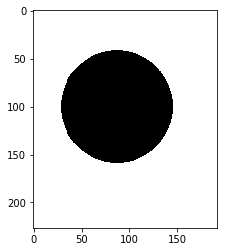

In [43]:
plt.imshow(X_array.reshape(n, m, 3))

In [45]:
def grayscale(X_array, n, m):
    km = KMeans(n_clusters=2)
    X_reshaped = X_array.reshape(n*m,3)
    km.fit(X_reshaped)
    X_grayscaled = km.labels_.reshape(n ,m)
    if X_grayscaled[0, 0]:
        X_grayscaled = np.ones(X_grayscaled.shape) - X_grayscaled
    return X_grayscaled

In [46]:
X_grayscaled = grayscale(X_array, n, m)

In [44]:
print("wiersze: ", n)
print("kolumny: ", m)

wiersze:  227
kolumny:  192


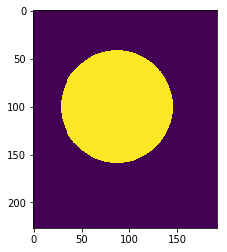

In [47]:
plt.imshow(X_grayscaled)

In [48]:
def find_args(X_grayscaled, m):
    args = np.argmax(X_grayscaled, axis=1)
    X_reversed = np.flip(X_grayscaled, axis=1)
    args_reversed = m - np.argmax(X_reversed, axis=1)
    args_diff = args_reversed - args
    return args_diff

In [49]:
args = find_args(X_grayscaled, m)

In [56]:
args_capped = args[args < m]

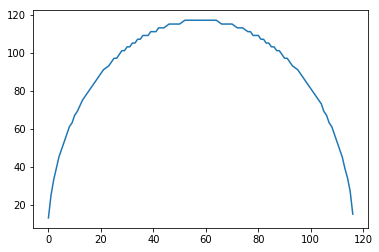

In [57]:
plt.plot(args_capped)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
np.arange(len(args_capped))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116])

In [61]:
import pandas as pd

In [62]:
X_train = pd.DataFrame({'linear': np.arange(len(args_capped)),
'power': np.power(np.arange(len(args_capped)), 2)})

In [63]:
lr.fit(X_train, args_capped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lr.coef_

array([ 2.93304752, -0.02526235])

In [65]:
lr.intercept_

35.408200307502355

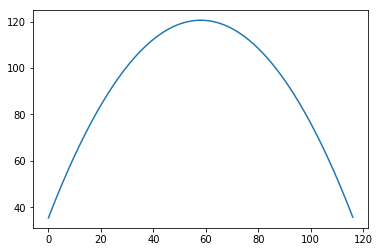

In [67]:
plt.plot(lr.predict(X_train))